### ETL/EDA

Imports

In [ ]:
import pandas as pd
import requests
import json
pd.reset_option('display.max_rows', None)
pd.set_option('display.max_rows', None)

Read in CSV

In [ ]:
data = pd.read_csv(r"C:\Users\ClaraMcGrath\Desktop\Capstone\data-downloads\Chicago_Public_Schools_-_School_Profile_Information_SY2223.csv")
type(data)


Examine statistics of dataset

In [ ]:
data.describe()

Look at all column names/types

In [ ]:
data.shape
data.info()

Make subsets for data (high school, middle, elementary, prek)
<br> Drop unnecessary columns

In [ ]:
profiles = data.drop(columns = ['Legacy_Unit_ID', 'Finance_ID', 'Administrator_Title', 'Administrator', 'Secondary_Contact_Title', 'Secondary_Contact', 'Address', 'Phone', 'Fax', 'CPS_School_Profile', 'Website', 'Facebook', 'Twitter', 'Youtube', 'Pinterest', 'Attendance_Boundaries', 'Grades_Offered_All', 'Dress_Code', 'PreK_School_Day', 'Kindergarten_School_Day', 'Freshman_Start_End_Time', 'After_School_Hours', 'Earliest_Drop_Off_Time', 'Classroom_Languages', 'PreSchool_Inclusive', 'Preschool_Instructional', 'Significantly_Modified', 'Hard_Of_Hearing', 'Visual_Impairments', 'Transportation_Bus', 'Transportation_El', 'Transportation_Metra', 'Average_ACT_School', 'Mean_ACT', 'Third_Contact_Title', 'Third_Contact_Name', 'Fourth_Contact_Title', 'Fourth_Contact_Name', 'Fifth_Contact_Title', 'Fifth_Contact_Name', 'Sixth_Contact_Title', 'Sixth_Contact_Name', 'Seventh_Contact_Title', 'Seventh_Contact_Name', 'Network', 'Is_GoCPS_Participant', 'Is_GoCPS_PreK', 'Is_GoCPS_Elementary', 'Is_GoCPS_High_School', 'Open_For_Enrollment_Date', 'Closed_For_Enrollment_Date', 'Location', 'multiSensory', 'SignificantlyModifiedMOD', 'transition'])
hs_data = data.drop(columns = ['Legacy_Unit_ID', 'Finance_ID', 'Administrator_Title', 'Administrator', 'Secondary_Contact_Title', 'Secondary_Contact', 'Address', 'Phone', 'Fax', 'CPS_School_Profile', 'Website', 'Facebook', 'Twitter', 'Youtube', 'Pinterest', 'Attendance_Boundaries', 'Grades_Offered_All', 'Dress_Code', 'PreK_School_Day', 'Kindergarten_School_Day', 'Freshman_Start_End_Time', 'After_School_Hours', 'Earliest_Drop_Off_Time', 'Classroom_Languages', 'PreSchool_Inclusive', 'Preschool_Instructional', 'Significantly_Modified', 'Hard_Of_Hearing', 'Visual_Impairments', 'Transportation_Bus', 'Transportation_El', 'Transportation_Metra', 'Average_ACT_School', 'Mean_ACT', 'Third_Contact_Title', 'Third_Contact_Name', 'Fourth_Contact_Title', 'Fourth_Contact_Name', 'Fifth_Contact_Title', 'Fifth_Contact_Name', 'Sixth_Contact_Title', 'Sixth_Contact_Name', 'Seventh_Contact_Title', 'Seventh_Contact_Name', 'Network', 'Is_GoCPS_Participant', 'Is_GoCPS_PreK', 'Is_GoCPS_Elementary', 'Is_GoCPS_High_School', 'Open_For_Enrollment_Date', 'Closed_For_Enrollment_Date', 'Location', 'multiSensory', 'SignificantlyModifiedMOD', 'transition', 'Is_Middle_School', 'Is_Elementary_School', 'Is_Pre_School'])
ms_data = data.drop(columns = ['Legacy_Unit_ID', 'Finance_ID', 'Administrator_Title', 'Administrator', 'Secondary_Contact_Title', 'Secondary_Contact', 'Address', 'Phone', 'Fax', 'CPS_School_Profile', 'Website', 'Facebook', 'Twitter', 'Youtube', 'Pinterest', 'Attendance_Boundaries', 'Grades_Offered_All', 'Dress_Code', 'PreK_School_Day', 'Kindergarten_School_Day', 'Freshman_Start_End_Time', 'After_School_Hours', 'Earliest_Drop_Off_Time', 'Classroom_Languages', 'PreSchool_Inclusive', 'Preschool_Instructional', 'Significantly_Modified', 'Hard_Of_Hearing', 'Visual_Impairments', 'Transportation_Bus', 'Transportation_El', 'Transportation_Metra', 'Average_ACT_School', 'Mean_ACT', 'Third_Contact_Title', 'Third_Contact_Name', 'Fourth_Contact_Title', 'Fourth_Contact_Name', 'Fifth_Contact_Title', 'Fifth_Contact_Name', 'Sixth_Contact_Title', 'Sixth_Contact_Name', 'Seventh_Contact_Title', 'Seventh_Contact_Name', 'Network', 'Is_GoCPS_Participant', 'Is_GoCPS_PreK', 'Is_GoCPS_Elementary', 'Is_GoCPS_High_School', 'Open_For_Enrollment_Date', 'Closed_For_Enrollment_Date', 'Location', 'multiSensory', 'SignificantlyModifiedMOD', 'transition', 'Is_High_School', 'Is_Elementary_School', 'Is_Pre_School'])
es_data = data.drop(columns = ['Legacy_Unit_ID', 'Finance_ID', 'Administrator_Title', 'Administrator', 'Secondary_Contact_Title', 'Secondary_Contact', 'Address', 'Phone', 'Fax', 'CPS_School_Profile', 'Website', 'Facebook', 'Twitter', 'Youtube', 'Pinterest', 'Attendance_Boundaries', 'Grades_Offered_All', 'Dress_Code', 'PreK_School_Day', 'Kindergarten_School_Day', 'Freshman_Start_End_Time', 'After_School_Hours', 'Earliest_Drop_Off_Time', 'Classroom_Languages', 'PreSchool_Inclusive', 'Preschool_Instructional', 'Significantly_Modified', 'Hard_Of_Hearing', 'Visual_Impairments', 'Transportation_Bus', 'Transportation_El', 'Transportation_Metra', 'Average_ACT_School', 'Mean_ACT', 'Third_Contact_Title', 'Third_Contact_Name', 'Fourth_Contact_Title', 'Fourth_Contact_Name', 'Fifth_Contact_Title', 'Fifth_Contact_Name', 'Sixth_Contact_Title', 'Sixth_Contact_Name', 'Seventh_Contact_Title', 'Seventh_Contact_Name', 'Network', 'Is_GoCPS_Participant', 'Is_GoCPS_PreK', 'Is_GoCPS_Elementary', 'Is_GoCPS_High_School', 'Open_For_Enrollment_Date', 'Closed_For_Enrollment_Date', 'Location', 'multiSensory', 'SignificantlyModifiedMOD', 'transition', 'Is_High_School', 'Is_Middle_School', 'Is_Pre_School', 'Average_ACT_School', 'Mean_ACT', 'College_Enrollment_Rate_School', 'College_Enrollment_Rate_Mean'])
ps_data = data.drop(columns = ['Legacy_Unit_ID', 'Finance_ID', 'Administrator_Title', 'Administrator', 'Secondary_Contact_Title', 'Secondary_Contact', 'Address', 'Phone', 'Fax', 'CPS_School_Profile', 'Website', 'Facebook', 'Twitter', 'Youtube', 'Pinterest', 'Attendance_Boundaries', 'Grades_Offered_All', 'Dress_Code', 'PreK_School_Day', 'Kindergarten_School_Day', 'Freshman_Start_End_Time', 'After_School_Hours', 'Earliest_Drop_Off_Time', 'Classroom_Languages', 'PreSchool_Inclusive', 'Preschool_Instructional', 'Significantly_Modified', 'Hard_Of_Hearing', 'Visual_Impairments', 'Transportation_Bus', 'Transportation_El', 'Transportation_Metra', 'Average_ACT_School', 'Mean_ACT', 'Third_Contact_Title', 'Third_Contact_Name', 'Fourth_Contact_Title', 'Fourth_Contact_Name', 'Fifth_Contact_Title', 'Fifth_Contact_Name', 'Sixth_Contact_Title', 'Sixth_Contact_Name', 'Seventh_Contact_Title', 'Seventh_Contact_Name', 'Network', 'Is_GoCPS_Participant', 'Is_GoCPS_PreK', 'Is_GoCPS_Elementary', 'Is_GoCPS_High_School', 'Open_For_Enrollment_Date', 'Closed_For_Enrollment_Date', 'Location', 'multiSensory', 'SignificantlyModifiedMOD', 'transition', 'Is_High_School', 'Is_Middle_School', 'Is_Elementary_School',  'Average_ACT_School', 'Mean_ACT', 'College_Enrollment_Rate_School', 'College_Enrollment_Rate_Mean'])


Check shape confirm drop

In [ ]:
profiles.shape, hs_data.shape, ms_data.shape, es_data.shape, ps_data.shape

Drop non-hs, ms, es, ps rows in each respective df

In [ ]:
hs = hs_data[hs_data['Is_High_School'] == True]
ms = ms_data[ms_data['Is_Middle_School'] == True]
es = es_data[es_data['Is_Elementary_School'] == True]
ps = ps_data[ps_data['Is_Pre_School'] == True]

Confirm changes in row count

In [ ]:
hs.shape, ms.shape, es.shape, ps.shape

Check for nulls in full df

In [ ]:
profiles.isnull().sum()

Check for nulls in subsets

In [ ]:
hs.isnull().sum(), ms.isnull().sum(), es.isnull().sum(), ps.isnull().sum()

In [ ]:
# aggregate profiles columns for race, low income

pd.set_option('mode.chained_assignment', None)
profiles['Student_Percent_Black'] = ((profiles['Student_Count_Black'] / profiles['Student_Count_Total']) * 100)
profiles['Student_Percent_Hispanic'] = ((profiles['Student_Count_Hispanic'] / profiles['Student_Count_Total']) * 100)
profiles['Student_Percent_White'] = ((profiles['Student_Count_White'] / profiles['Student_Count_Total']) * 100)
profiles['Student_Percent_Asian'] = ((profiles['Student_Count_Asian'] / profiles['Student_Count_Total']) * 100)
profiles['Student_Percent_Native_American'] = ((profiles['Student_Count_Native_American'] / profiles['Student_Count_Total']) * 100)
profiles['Student_Percent_Asian_Pacific_Islander'] = ((profiles['Student_Count_Asian_Pacific_Islander'] / profiles['Student_Count_Total']) * 100)
profiles['Student_Percent_Other_Ethnicity'] = ((profiles['Student_Count_Other_Ethnicity'] / profiles['Student_Count_Total']) * 100)
profiles['Student_Percent_Multi'] = ((profiles['Student_Count_Multi'] / profiles['Student_Count_Total']) * 100)
profiles['Student_Percent_Hawaiian_Pacific_Islander'] = ((profiles['Student_Count_Hawaiian_Pacific_Islander'] / profiles['Student_Count_Total']) * 100)
profiles['Student_Percent_Ethnicity_Not_Available'] = ((profiles['Student_Count_Ethnicity_Not_Available'] / profiles['Student_Count_Total']) * 100)
profiles['Student_Percent_Low_Income'] = ((profiles['Student_Count_Low_Income'] / profiles['Student_Count_Total']) * 100)

In [ ]:
# aggregate hs columns for race, low income

pd.set_option('mode.chained_assignment', None)
hs['Student_Percent_Black'] = ((hs['Student_Count_Black'] / hs['Student_Count_Total']) * 100)
hs['Student_Percent_Hispanic'] = ((hs['Student_Count_Hispanic'] / hs['Student_Count_Total']) * 100)
hs['Student_Percent_White'] = ((hs['Student_Count_White'] / hs['Student_Count_Total']) * 100)
hs['Student_Percent_Asian'] = ((hs['Student_Count_Asian'] / hs['Student_Count_Total']) * 100)
hs['Student_Percent_Native_American'] = ((hs['Student_Count_Native_American'] / hs['Student_Count_Total']) * 100)
hs['Student_Percent_Asian_Pacific_Islander'] = ((hs['Student_Count_Asian_Pacific_Islander'] / hs['Student_Count_Total']) * 100)
hs['Student_Percent_Other_Ethnicity'] = ((hs['Student_Count_Other_Ethnicity'] / hs['Student_Count_Total']) * 100)
hs['Student_Percent_Multi'] = ((hs['Student_Count_Multi'] / hs['Student_Count_Total']) * 100)
hs['Student_Percent_Hawaiian_Pacific_Islander'] = ((hs['Student_Count_Hawaiian_Pacific_Islander'] / hs['Student_Count_Total']) * 100)
hs['Student_Percent_Ethnicity_Not_Available'] = ((hs['Student_Count_Ethnicity_Not_Available'] / hs['Student_Count_Total']) * 100)
hs['Student_Percent_Low_Income'] = ((hs['Student_Count_Low_Income'] / hs['Student_Count_Total']) * 100)

In [ ]:
# ms columns

pd.set_option('mode.chained_assignment', None)
ms['Student_Percent_Black'] = ((ms['Student_Count_Black'] / ms['Student_Count_Total']) * 100)
ms['Student_Percent_Hispanic'] = ((ms['Student_Count_Hispanic'] / ms['Student_Count_Total']) * 100)
ms['Student_Percent_White'] = ((ms['Student_Count_White'] / ms['Student_Count_Total']) * 100)
ms['Student_Percent_Asian'] = ((ms['Student_Count_Asian'] / ms['Student_Count_Total']) * 100)
ms['Student_Percent_Native_American'] = ((ms['Student_Count_Native_American'] / ms['Student_Count_Total']) * 100)
ms['Student_Percent_Asian_Pacific_Islander'] = ((ms['Student_Count_Asian_Pacific_Islander'] / ms['Student_Count_Total']) * 100)
ms['Student_Percent_Other_Ethnicity'] = ((ms['Student_Count_Other_Ethnicity'] / ms['Student_Count_Total']) * 100)
ms['Student_Percent_Multi'] = ((ms['Student_Count_Multi'] / ms['Student_Count_Total']) * 100)
ms['Student_Percent_Hawaiian_Pacific_Islander'] = ((ms['Student_Count_Hawaiian_Pacific_Islander'] / ms['Student_Count_Total']) * 100)
ms['Student_Percent_Ethnicity_Not_Available'] = ((ms['Student_Count_Ethnicity_Not_Available'] / ms['Student_Count_Total']) * 100)
ms['Student_Percent_Low_Income'] = ((ms['Student_Count_Low_Income'] / ms['Student_Count_Total']) * 100)

In [ ]:
# es columns

pd.set_option('mode.chained_assignment', None)
es['Student_Percent_Black'] = ((es['Student_Count_Black'] / es['Student_Count_Total']) * 100)
es['Student_Percent_Hispanic'] = ((es['Student_Count_Hispanic'] / es['Student_Count_Total']) * 100)
es['Student_Percent_White'] = ((es['Student_Count_White'] / es['Student_Count_Total']) * 100)
es['Student_Percent_Asian'] = ((es['Student_Count_Asian'] / es['Student_Count_Total']) * 100)
es['Student_Percent_Native_American'] = ((es['Student_Count_Native_American'] / es['Student_Count_Total']) * 100)
es['Student_Percent_Asian_Pacific_Islander'] = ((es['Student_Count_Asian_Pacific_Islander'] / es['Student_Count_Total']) * 100)
es['Student_Percent_Other_Ethnicity'] = ((es['Student_Count_Other_Ethnicity'] / es['Student_Count_Total']) * 100)
es['Student_Percent_Multi'] = ((es['Student_Count_Multi'] / es['Student_Count_Total']) * 100)
es['Student_Percent_Hawaiian_Pacific_Islander'] = ((es['Student_Count_Hawaiian_Pacific_Islander'] / es['Student_Count_Total']) * 100)
es['Student_Percent_Ethnicity_Not_Available'] = ((es['Student_Count_Ethnicity_Not_Available'] / es['Student_Count_Total']) * 100)
es['Student_Percent_Low_Income'] = ((es['Student_Count_Low_Income'] / es['Student_Count_Total']) * 100)

In [ ]:
# ps columns

pd.set_option('mode.chained_assignment', None)
ps['Student_Percent_Black'] = ((ps['Student_Count_Black'] / ps['Student_Count_Total']) * 100)
ps['Student_Percent_Hispanic'] = ((ps['Student_Count_Hispanic'] / ps['Student_Count_Total']) * 100)
ps['Student_Percent_White'] = ((ps['Student_Count_White'] / ps['Student_Count_Total']) * 100)
ps['Student_Percent_Asian'] = ((ps['Student_Count_Asian'] / ps['Student_Count_Total']) * 100)
ps['Student_Percent_Native_American'] = ((ps['Student_Count_Native_American'] / ps['Student_Count_Total']) * 100)
ps['Student_Percent_Asian_Pacific_Islander'] = ((ps['Student_Count_Asian_Pacific_Islander'] / ps['Student_Count_Total']) * 100)
ps['Student_Percent_Other_Ethnicity'] = ((ps['Student_Count_Other_Ethnicity'] / ps['Student_Count_Total']) * 100)
ps['Student_Percent_Multi'] = ((ps['Student_Count_Multi'] / ps['Student_Count_Total']) * 100)
ps['Student_Percent_Hawaiian_Pacific_Islander'] = ((ps['Student_Count_Hawaiian_Pacific_Islander'] / ps['Student_Count_Total']) * 100)
ps['Student_Percent_Ethnicity_Not_Available'] = ((ps['Student_Count_Ethnicity_Not_Available'] / ps['Student_Count_Total']) * 100)
ps['Student_Percent_Low_Income'] = ((ps['Student_Count_Low_Income'] / ps['Student_Count_Total']) * 100)

In [ ]:
# pd.reset_option('max_columns', None)
pd.set_option('display.max_columns', None)
profiles.head()

Check r value between graduation rate and college enrollment rate

In [ ]:
grad_college_cor = profiles['Graduation_Rate_School'].corr(profiles['College_Enrollment_Rate_School'])
print(grad_college_cor)

Check r value between student count & graduation rate

In [ ]:
count_grad_cor = profiles['Student_Count_Total'].corr(profiles['Graduation_Rate_School'])
print(count_grad_cor)

### EXPLORATORY VISUALIZATIONS

Visualization Imports

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

In [ ]:
hs.sort_values(by='Student_Count_Total', ascending=False, inplace=True)

hs.head(30)

In [ ]:
top_10 = hs.head(10)
top_10 = top_10.unstack(level=1)
x = top_10['Short_Name']
y1 = top_10['Student_Percent_White']
y2 = top_10['Student_Percent_Black']
y3 = top_10['Student_Percent_Asian']
y4 = top_10['Student_Percent_Native_American']
y5 = top_10['Student_Percent_Asian_Pacific_Islander']
y6 = top_10['Student_Percent_Hawaiian_Pacific_Islander']
y7 = top_10['Student_Percent_Hispanic']
y8 = top_10['Student_Percent_Multi']
y9 = top_10['Student_Percent_Other_Ethnicity']
y10 = top_10['Student_Percent_Ethnicity_Not_Available']

plt.bar(x, y1, label='White')
plt.bar(x, y2, bottom=y1, label='Black')
plt.bar(x, y3, bottom=y1+y2, label='Asian')
plt.bar(x, y4, bottom=y1+y2+y3, label='Native_American')
plt.bar(x, y5, bottom=y1+y2+y3+y4, label='Asian_Pacific_Islander')
plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, label='Hawaiian_Pacific_Islander')
plt.bar(x, y7, bottom=y1+y2+y3+y4+y5+y6, label='Hispanic')
plt.bar(x, y8, bottom=y1+y2+y3+y4+y5+y6+y7, label='Multi')
plt.bar(x, y9, bottom=y1+y2+y3+y4+y5+y6+y7+y8, label='Other_Ethnicity')
plt.bar(x, y10, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9, label='Ethnicity_Not_Available')

plt.xlabel('School (top 10 largest)')
plt.ylabel('% of Student Count')
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=80)

plt.show()

Histograms to look at distributions of graduation & college enrollment rates for schools

In [ ]:
profiles.Graduation_Rate_School.hist()

In [ ]:
profiles.College_Enrollment_Rate_School.hist()

Map from PowerBI -> see geographic ditribution of schools & size dot by graduation rate

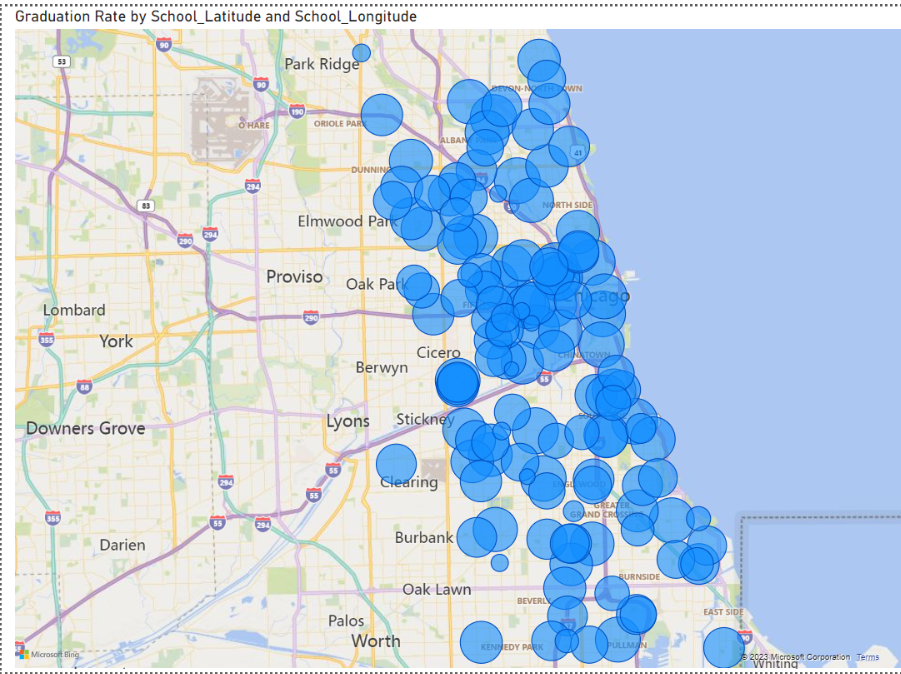

BarH from PowerBI - stack bar to show breakdown for each school 
<br> Note: Screenshot only includes top ~30

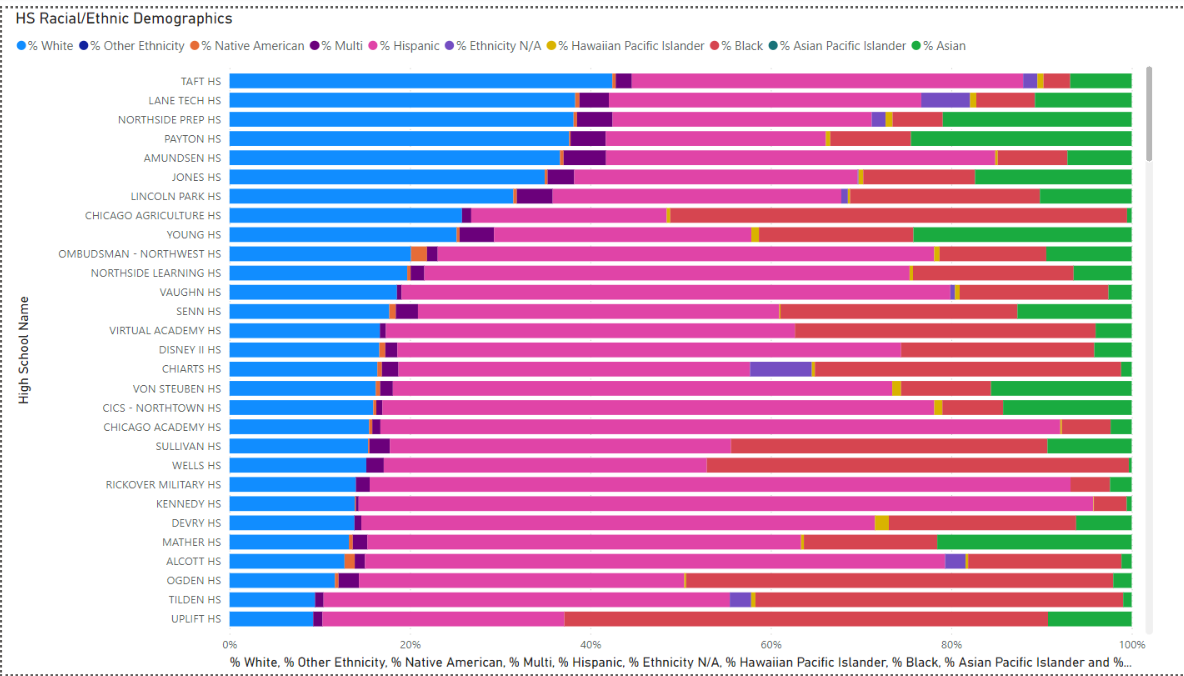

Export each df as csv

In [ ]:
profiles.to_csv('cps_profiles.csv')

In [ ]:
# hs.to_csv('cps_hs.csv') -- commented out because unclear if we'll be using it

In [ ]:
# ms.to_csv('cps_ms.csv')

In [ ]:
# es.to_csv('cps_es.csv')

In [ ]:
# ps.to_csv('cps_ps.csv')

Read in 3 different csv's for merge

In [ ]:
profile = pd.read_csv('cps_profiles.csv')
safety = pd.read_csv('cps_safety.csv')
crime = pd.read_csv('Crimes_-_2022.csv')

Merge profile and safety on School ID

In [ ]:
merge = profile.merge(safety, on='School_ID',how='left')

Drop columns from merge

In [ ]:
clean = merge.drop(columns=[ 'Long_Name_y', 'Primary_Category_y', 'Zip_y', 'Student_Count_Total_y', 'Student_Count_Low_Income_y', 'Student_Count_Special_Ed_y', 'Student_Count_Black_y', 'Student_Count_Hispanic_y', 'Student_Count_White_y', 'Student_Count_Asian_y', 'Student_Count_Native_American_y', 'Student_Count_Asian_Pacific_Islander_y', 'Student_Count_Hawaiian_Pacific_Islander_y', 'Statistics_Description_y', 'Demographic_Description_y', 'Overall_Rating_y', 'School_Latitude_y', 'School_Longitude_y'])

Select necessary columns from crime data in new dataframe

In [ ]:
crime_select = crime[[ 'Ward', 'Year']]
crime_select = crime_select[crime_select['Year'] == 2022]
crime_select = crime_select.groupby(['Ward', 'Year']).size().reset_index(name = 'num_crimes')

Merge new crime df with previous merge of profiles/safety

In [ ]:
merged_data = pd.merge(clean, crime_select, on='Ward', how='outer')

Create dfs for the visuals

In [ ]:
viz1 = merged_data[['Graduation_Rate_School', 'College_Enrollment_Rate_School','Short_Name', 'num_crimes', 'Ward']]
viz2 = merged_data[['Student_Percent_Black', 'Student_Percent_Hispanic', 'Student_Percent_White', 'Student_Percent_Asian', 'Student_Percent_Native_American', 'Student_Percent_Asian_Pacific_Islander', 'Student_Percent_Multi', 'Student_Percent_Hawaiian_Pacific_Islander', 'Student_Percent_Ethnicity_Not_Available', 'Student_Percent_Low_Income', 'num_crimes']]

Rename columns for readability

In [ ]:
viz2 = viz2.rename(columns = {
    "Student_Percent_Black":"% Black",
    "Student_Percent_Hispanic":"% Hispanic",
    "Student_Percent_White":"% White",
    "Student_Percent_Asian":"% Asian",
    "Student_Percent_Native_American":"% Native American",
    "Student_Percent_Asian_Pacific_Islander":"% Asian Pacific Islander",
    "Student_Percent_Multi":"% Multi",
    "Student_Percent_Hawaiian_Pacific_Islander":"% Hawaiian Pacific Islander",
    "Student_Percent_Ethnicity_Not_Available":"N/A",
    "Student_Percent_Low_Income":"% Low Income",
    "num_crimes":"# Crimes"
})

Calculate correlations

In [ ]:
grad_crime_cor = viz1['num_crimes'].corr(viz1['Graduation_Rate_School'])
print(grad_crime_cor)

Seaborn visuals (scatter & heat)

In [ ]:
sns.scatterplot(x = 'Graduation_Rate_School', y = 'num_crimes', data=viz1)

In [ ]:
heat = sns.heatmap(viz2.corr())

Rewrite visuals for Dash in plotly express, pass in more parameters for design/readability

In [ ]:
fig1 = px.scatter(viz1, x = 'Graduation_Rate_School', y = 'num_crimes', trendline = 'ols',
                  labels={
                     "Graduation_Rate_School": "School Graduation Rates",
                     "num_crimes": "Number of Crimes",
                 },
                  title = 'Graduation Rates vs. Number of Crimes in Ward Area (2022)')
fig1.show()

In [ ]:
fig2 = px.imshow(viz2.corr(),
               x=viz2.columns,
               y=viz2.columns,
               color_continuous_scale = 'pubugn',
               title='Number of Crimes x Student Demographics')

fig2.show()